Stock Price Prediction using Machine Learning

In [2]:
# importing necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
#Loading the dataset and conerting it into a dataframe
Stock_price_dataframe=pd.read_csv("TSLA.csv")
Stock_price_dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [4]:
Stock_price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [5]:
Stock_price_dataframe.shape

(2416, 7)

In [6]:
Stock_price_dataframe.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = Stock_price_dataframe['Adj Close']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

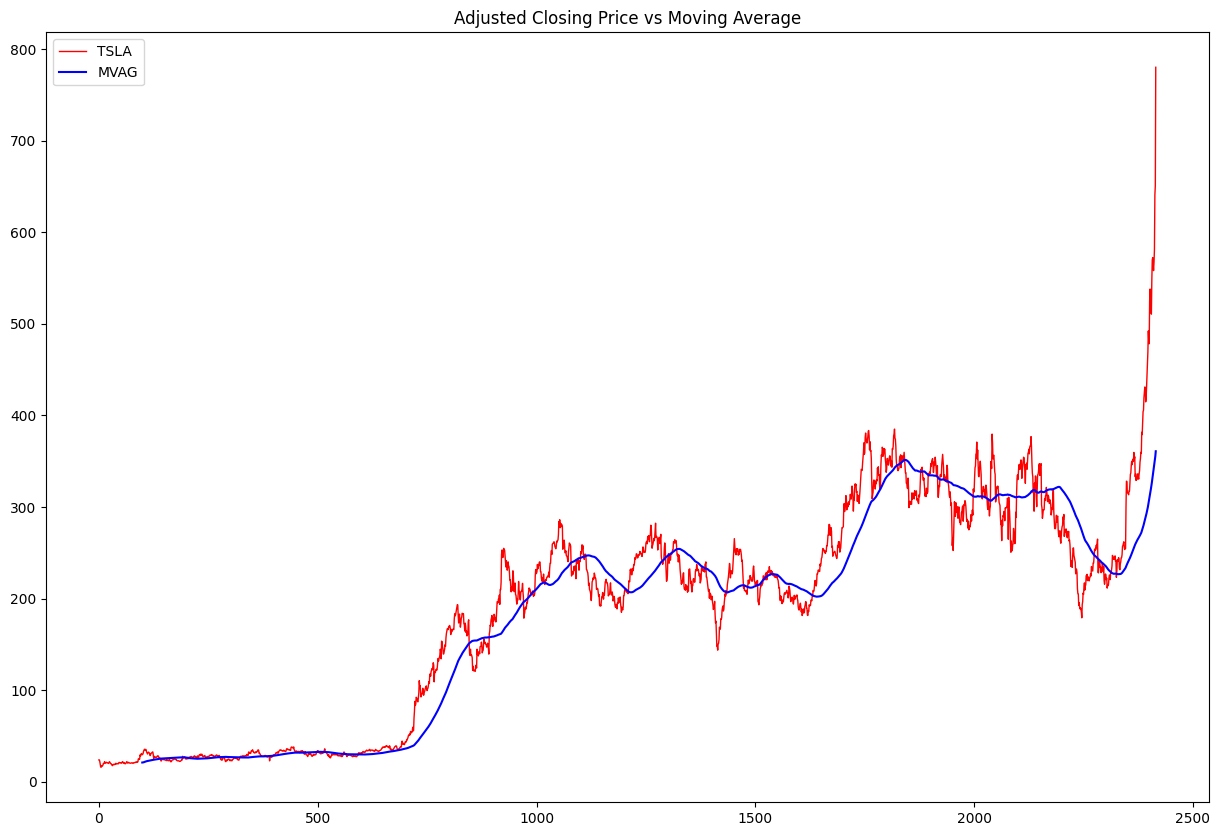

In [8]:
# Visualizing Rolling Mean and Adjusted Closing Price together

Stock_price_dataframe['Adj Close'].plot(label='TSLA', figsize=(15,10), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

In [9]:
#checking if both the columns are having the same values
Stock_price_dataframe[Stock_price_dataframe['Close'] == Stock_price_dataframe['Adj Close']].shape

(2416, 7)

This tells us that the data in the close culomn is equal to the data in the adjacent close column.
So we will drop the data of the adjacent close column.

In [10]:
#as both the columns data were same so dropping 1 column
Stock_price_dataframe=Stock_price_dataframe.drop(columns=['Adj Close'])

C:\Users\kusha\AppData\Roaming\Python\Python312\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


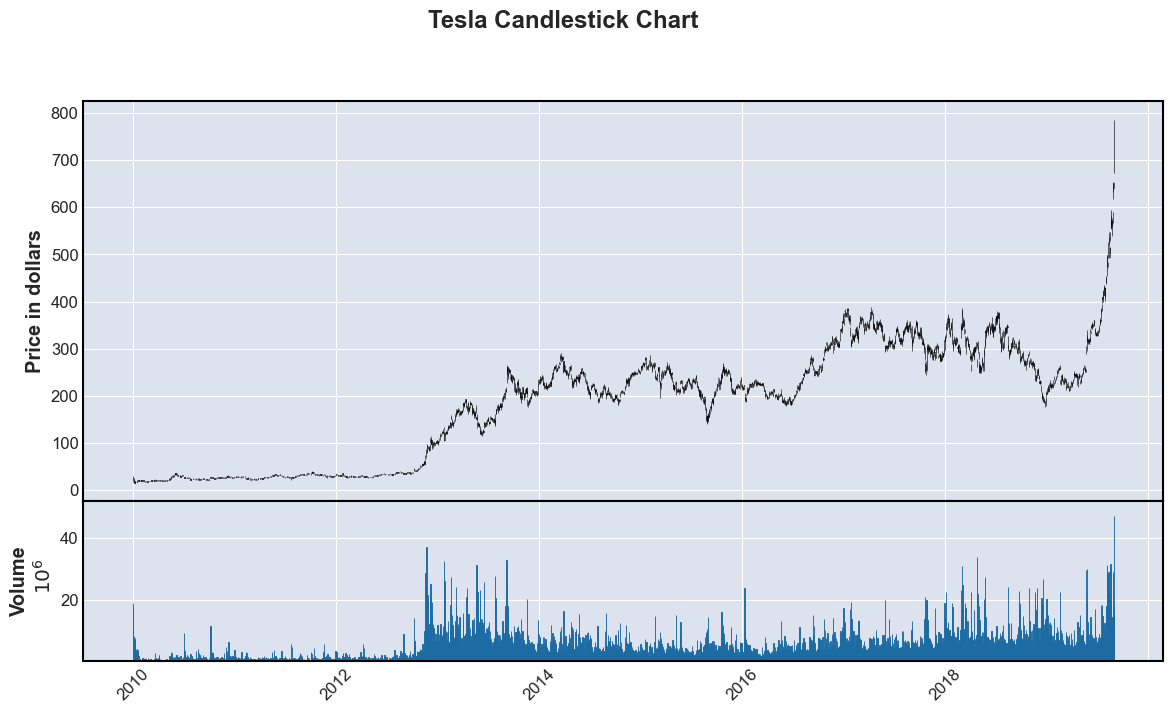

In [11]:
# mplfinance expects the index of your DataFrame to be of type DatetimeIndex
Stock_price_dataframe['Date'] = pd.to_datetime(Stock_price_dataframe['Date'])  # typecasting 'Date' column to datetime format
Stock_price_dataframe.set_index('Date', inplace=True)  # set 'Date' column as index

mpf.plot(Stock_price_dataframe,
         type='candle',
         volume=True,  # used for Showing volume of shares bought
         title='Tesla Candlestick Chart',
         ylabel='Price in dollars',
         ylabel_lower='Volume',
         datetime_format='%Y',  # Format for displaying only year on x-axis
         figsize=(15, 8))

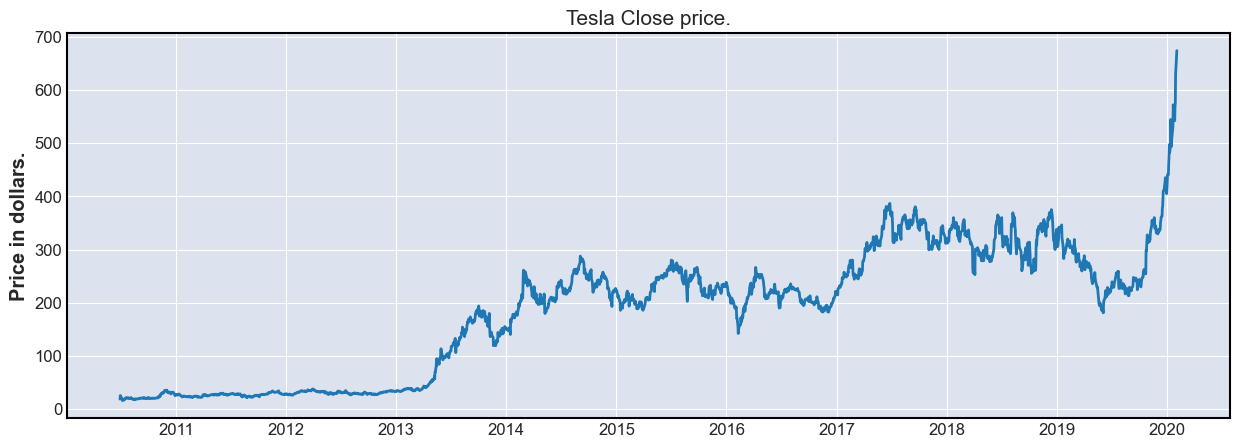

In [12]:
plt.figure(figsize=(15,5))
plt.plot(Stock_price_dataframe['Open'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

Text(0.5, 1.0, 'Distribution of Close')

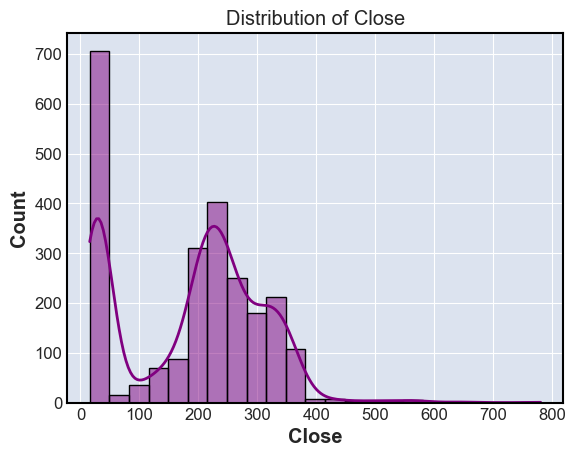

In [13]:
#plotting histplot graph for Close
sns.histplot(data=Stock_price_dataframe, x='Close',color='purple', kde=True)
plt.title("Distribution of Close")

Text(0.5, 1.0, 'Distribution of Adj High')

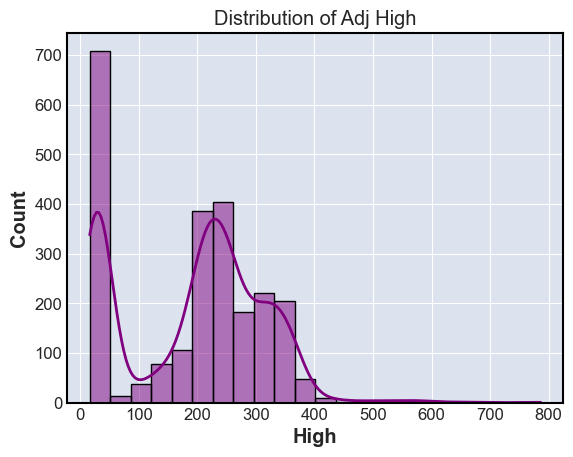

In [14]:
#plotting histplot graph for High
sns.histplot(data=Stock_price_dataframe, x='High',color='purple', kde=True)
plt.title("Distribution of Adj High")

Text(0.5, 1.0, 'Distribution of Volume')

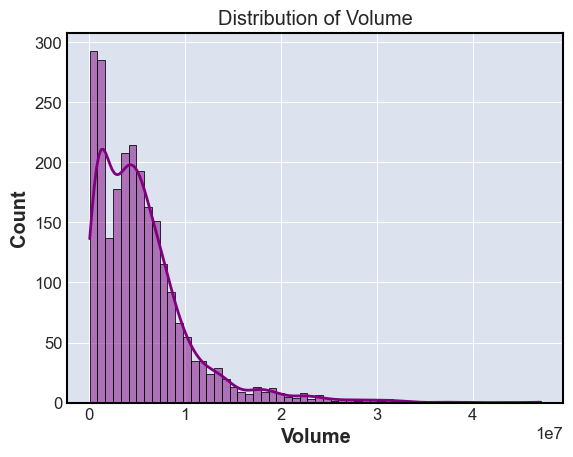

In [15]:
#plotting histplot graph for Volume
sns.histplot(data=Stock_price_dataframe, x='Volume',color='purple', kde=True)
plt.title("Distribution of Volume")

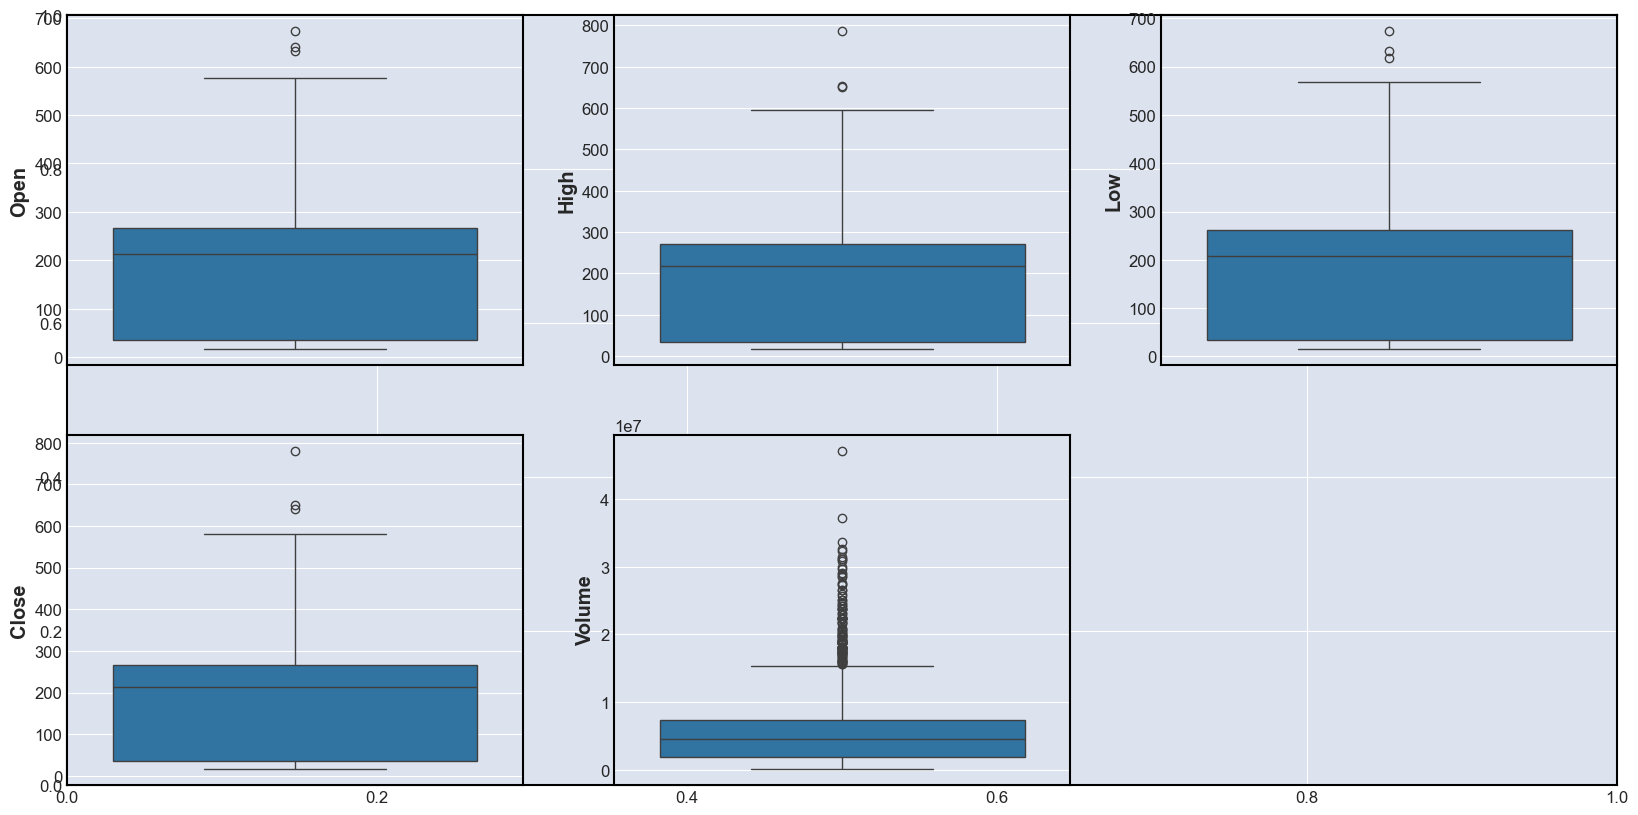

In [16]:
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, column in enumerate(columns):
  plt.subplot(2,3,i+1)
  sns.boxplot(Stock_price_dataframe[column])
plt.show()

In [17]:
Stock_price_dataframe.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [18]:
# Stock_price_dataframe['Prediction']

In [19]:
#splitting the data into features and target variable
X=Stock_price_dataframe.drop(columns=['Close'])
y=Stock_price_dataframe['Close']

In [20]:
#creating an object of StandardScaler
scaler=StandardScaler()

#Scaling the features
X=scaler.fit_transform(X)

In [21]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Initializing the linear_regression_model
linear_regression_model=LinearRegression()

#training the linear_regression_model
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [23]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction1=linear_regression_model.predict(X_test)
training_prediction1=linear_regression_model.predict(X_train)

In [24]:
print("R2 score of our model on testing data: ",r2_score(y_test,testing_prediction1))
print("R2 score of our model on training data: ",r2_score(y_train,training_prediction1))

R2 score of our model on testing data:  0.9997258990593382
R2 score of our model on training data:  0.9997017208677106


In [25]:
linear_model_mse = mean_squared_error(y_test, testing_prediction1)
linear_model_rmse = np.sqrt(linear_model_mse)
linear_model_mae = mean_absolute_error(y_test, testing_prediction1)

print("Mean Squared Error:", linear_model_mse)
print("Root Mean Squared Error:", linear_model_rmse)
print("Mean Absolute Error:", linear_model_mae)

Mean Squared Error: 4.168987511013474
Root Mean Squared Error: 2.041809861621173
Mean Absolute Error: 1.3295570713435716


In [26]:
# Initializing the random_forest_model with parameter n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2
random_forest_model=RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2)

#training the random_forest_model
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=200)

In [27]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction2=random_forest_model.predict(X_test)
training_prediction2=random_forest_model.predict(X_train)

In [28]:
print("R2 score of our model on testing data: ",r2_score(y_test,testing_prediction2))
print("R2 score of our model on training data: ",r2_score(y_train,training_prediction2))

R2 score of our model on testing data:  0.9993418163749372
R2 score of our model on training data:  0.9996666935106561


In [29]:
random_forest_model_mse = mean_squared_error(y_test, testing_prediction2)
random_forest_model_rmse = np.sqrt(random_forest_model_mse)
random_forest_model_mae = mean_absolute_error(y_test, testing_prediction2)

print("Mean Squared Error:", random_forest_model_mse)
print("Root Mean Squared Error:", random_forest_model_rmse)
print("Mean Absolute Error:", linear_model_mae)

Mean Squared Error: 10.010762116376972
Root Mean Squared Error: 3.1639788425931314
Mean Absolute Error: 1.3295570713435716


In [30]:
# Initializing the support_vector_regressor_model with parameter kernel='linear'
support_vector_regressor_model=SVR(kernel='linear')

#training the support_vector_regressor_model
support_vector_regressor_model.fit(X_train,y_train)

SVR(kernel='linear')

In [31]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction3=support_vector_regressor_model.predict(X_test)
training_prediction3=support_vector_regressor_model.predict(X_train)

In [32]:
print("R2 score of our model on testing data: ",r2_score(y_test,testing_prediction3))
print("R2 score of our model on training data: ",r2_score(y_train,training_prediction3))

R2 score of our model on testing data:  0.9993120810877991
R2 score of our model on training data:  0.9990674610358492


In [33]:
support_vector_model_mse = mean_squared_error(y_test, testing_prediction3)
support_vector_model_rmse = np.sqrt(support_vector_model_mse)
support_vector_model_mae = mean_absolute_error(y_test, testing_prediction3)

print("Mean Squared Error:", support_vector_model_mse)
print("Root Mean Squared Error:", support_vector_model_rmse)
print("Mean Absolute Error:", support_vector_model_mae)

Mean Squared Error: 10.463026309325722
Root Mean Squared Error: 3.2346601536058963
Mean Absolute Error: 2.0632891764910304


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

In [35]:
# Defining the Ridge Regression Model

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)     # Training the algorithm

Ridge(alpha=0.001)

In [36]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction4=ridge_model.predict(X_test)
training_prediction4=ridge_model.predict(X_train)

In [37]:
print("R2 score of our model on testing data: ",r2_score(y_test,testing_prediction4))
print("R2 score of our model on training data: ",r2_score(y_train,training_prediction4))

R2 score of our model on testing data:  0.9997258738629893
R2 score of our model on training data:  0.9997017198235283


In [38]:
ridge_model_mse=mean_squared_error(y_test,testing_prediction4)
print("Mean Squared Error:", ridge_model_mse)

Mean Squared Error: 4.1693707394097945


In [39]:
# Defining the Ridge Regression Model

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)     # Training the algorithm

C:\Users\kusha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.779e+03, tolerance: 2.324e+03
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [40]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction5=lasso_model.predict(X_test)
training_prediction5=lasso_model.predict(X_train)

In [41]:
print("R2 score of our model on testing data: ",r2_score(y_test,testing_prediction5))
print("R2 score of our model on training data: ",r2_score(y_train,training_prediction5))

R2 score of our model on testing data:  0.9992676197290127
R2 score of our model on training data:  0.9992021993173312


In [42]:
lasso_model_mse=mean_squared_error(y_test,testing_prediction4)
print("Mean Squared Error:", lasso_model_mse)

Mean Squared Error: 4.1693707394097945


So by looking at all the algorithms mean squared error we come to know that the mean squared error of the linear regression is minimum.
So it is the best algorithm among all i have used (Linear Regression, Random Forest Support vector, lasso and ridge) we can use to predict the closing price of this model.

In [43]:
print("Mean Squared Error:", linear_model_mse)

Mean Squared Error: 4.168987511013474
